# Implemnting Decision Tree ID3 Algorithm

In [37]:
import numpy as np 
import pandas as pd

In [38]:
df = pd.read_csv("BreastCancer.csv") #read the data
df.head() #view the first five rows


In [ ]:
# define function to calculate total entropy
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] #the total size of the dataset
    total_entr = 0
    
    for c in class_list: #for each class in the label
        total_class_count = train_data[train_data[label] == c].shape[0] #number of the class
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) #entropy of the class
        total_entr += total_class_entr #adding the class entropy to the total entropy of the dataset
    
    return total_entr

In [ ]:
# define function to calculate entropy for specific feature 
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] #row count of class c 
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count #probability of the class
            entropy_class = - probability_class * np.log2(probability_class)  #entropy
        entropy += entropy_class
    return entropy

In [ ]:
#function to calculate info gain 
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() #unqiue values of the feature
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value] #filtering rows with that feature_value
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) #calculcating entropy for the feature value
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy #calculating information of the feature value
        
    return calc_total_entropy(train_data, label, class_list) - feature_info #calculating information gain by subtracting


In [ ]:
#function to get the most informative feature
def find_most_informative_feature(data, label, class_list):
    feature_list = data.columns.drop(label) #finding the feature names in the dataset
                                            #N.B. label is not a feature, so dropping it
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  #for each feature in the dataset
        feature_info_gain = calc_info_gain(feature, data, label, class_list)
        if max_info_gain < feature_info_gain: #selecting feature name with highest information gain
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature #Return the feature with max info

In [ ]:
# function the get sub-tree (nodes)
def generate_sub_tree(feature, train_data, label, class_list):
    feature_value_count_dict = train_data[feature].value_counts(sort=False) #dictionary of the count of unqiue feature value
    tree = {} #sub tree or node
    
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature] == feature_value] #dataset with only feature = feature_value
        
        assigned_to_node = False #flag for tracking feature_value is pure class or not
        for c in class_list: #for each class
            class_count = feature_value_data[feature_value_data[label] == c].shape[0] #count of class c

            if class_count == count: #count of (feature_value = count) of class (pure class)
                tree[feature_value] = c #adding node to the tree
                train_data = train_data[train_data[feature] != feature_value] #removing rows with feature_value
                assigned_to_node = True
        if not assigned_to_node: #not pure class
            tree[feature_value] = "?" #as feature_value is not a pure class, it should be expanded further, 
                                        #so the branch is marking with ?
            
    return tree, train_data

In [ ]:
# now with the help of the previous functions , we generate the tree 
def make_tree(root, prev_feature_value, data, label, class_list):
    if data.shape[0] != 0: #if dataset becomes enpty after updating
        max_info_feature = find_most_informative_feature(data, label, class_list) #most informative feature
        tree, train_data = generate_sub_tree(max_info_feature, data, label, class_list) #getting tree node and updated dataset
        next_root = None
        
        if prev_feature_value != None: #add to intermediate node of the tree
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else: #add to root of the tree
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()): #iterating the tree node
            if branch == "?": #if it is expandable
                feature_value_data = train_data[train_data[max_info_feature] == node] #using the updated dataset
                make_tree(next_root, node, feature_value_data, label, class_list) #recursive call with updated dataset


In [ ]:
#function to generate id3 tree
def id3(train_data_m, label):
    train_data = train_data_m.copy() #getting a copy of the dataset
    tree = {} #tree which will be updated
    class_list = train_data[label].unique() #getting unqiue classes of the label
    make_tree(tree, None, train_data, label, class_list) #start calling recursion
    return tree

In [ ]:
tree = id3(df, 'diagnosis')
print(tree)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_18380\86681295.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature_value, count in feature_value_count_dict.iteritems():


{'id': {842302: 'M', 842517: 'M', 84300903: 'M', 84348301: 'M', 84358402: 'M', 843786: 'M', 844359: 'M', 84458202: 'M', 844981: 'M', 84501001: 'M', 845636: 'M', 84610002: 'M', 846226: 'M', 846381: 'M', 84667401: 'M', 84799002: 'M', 848406: 'M', 84862001: 'M', 849014: 'M', 8510426: 'B', 8510653: 'B', 8510824: 'B', 8511133: 'M', 851509: 'M', 852552: 'M', 852631: 'M', 852763: 'M', 852781: 'M', 852973: 'M', 853201: 'M', 853401: 'M', 853612: 'M', 85382601: 'M', 854002: 'M', 854039: 'M', 854253: 'M', 854268: 'M', 854941: 'B', 855133: 'M', 855138: 'M', 855167: 'M', 855563: 'M', 855625: 'M', 856106: 'M', 85638502: 'M', 857010: 'M', 85713702: 'B', 85715: 'M', 857155: 'B', 857156: 'B', 857343: 'B', 857373: 'B', 857374: 'B', 857392: 'M', 857438: 'M', 85759902: 'B', 857637: 'M', 857793: 'M', 857810: 'B', 858477: 'B', 858970: 'B', 858981: 'B', 858986: 'M', 859196: 'B', 85922302: 'M', 859283: 'M', 859464: 'B', 859465: 'B', 859471: 'B', 859487: 'B', 859575: 'M', 859711: 'B', 859717: 'M', 859983: 'M',

In [ ]:
#prediction function
def predict(tree, instance):
    if not isinstance(tree, dict): #if it is leaf node
        return tree #return the value
    else:
        root_node = next(iter(tree)) #getting first key/feature name of the dictionary
        feature_value = instance[root_node] #value of the feature
        if feature_value in tree[root_node]: #checking the feature value in current tree node
            return predict(tree[root_node][feature_value], instance) #goto next feature
        else:
            return None

In [ ]:
#function to do the final evaluation
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows(): #for each row in the dataset
        result = predict(tree, test_data_m.iloc[index]) #predict the row
        if result == test_data_m[label].iloc[index]: #predicted value and expected value is same or not
            correct_preditct += 1 #increase correct count
        else:
            wrong_preditct += 1 #increase incorrect count
    accuracy = correct_preditct / (correct_preditct + wrong_preditct) #calculating accuracy
    return accuracy

In [ ]:

accuracy = evaluate(tree, df,'diagnosis') #evaluating the test dataset
print("Your estimated accuracy is:",accuracy)

Your estimated accuracy is: 1.0


## Calculate cnofusion matrix & Classification report using sklearn.tree model

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['diagnosis','Unnamed: 32']) #Unamed:32 contains Nan values so we drop it
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #split the data


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) #make prediciton

confusion matrix:
 [[69  3]
 [ 7 35]]


<AxesSubplot: >

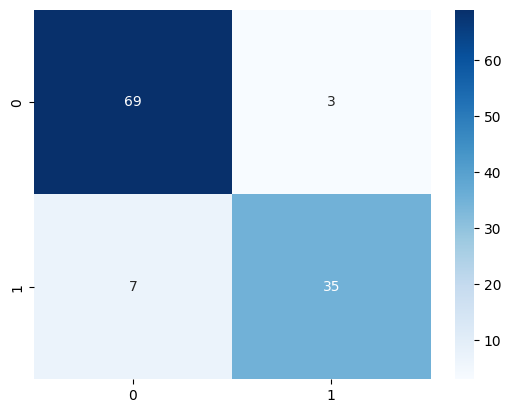

In [ ]:
#get the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Blues", annot=True)

In [ ]:
#print the classification report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           B       0.91      0.96      0.93        72
           M       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

